First we import the nessesary libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Reading in the data:

In [ ]:
census_data = pd.read_csv('Census.csv', encoding = 'latin-1')
census_data.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


Preprocessing:

In [ ]:
# Fill in missing variables with 0
census_data.fillna(0, inplace=True)

# Create X and Y datasets
census_X = census_data.drop(['Income', 'IncomeErr', 'State', 'County', 'Pacific', 'VotingAgeCitizen', 'Carpool'], axis=1)
census_Y = census_data['Income']

# Change Y dataset to be binary values based on being above or below 50000
census_Y = census_Y.apply(lambda x: 1 if x >= 50000 else 0)

# Split the data
train_X, test_X, train_y, test_y = train_test_split(census_X, census_Y, test_size = 0.25, random_state = 1)


census_Y.head()

,Income
0,1
1,1
2,0
3,0
4,0


Model Training:

In [ ]:
param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}

gradientBoost = GradientBoostingClassifier()

random_search = RandomizedSearchCV(estimator=gradientBoost, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(train_X, train_y)

best_params_random = random_search.best_params_

print("Best Parameters", best_params_random)

Best Parameters {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1577777777777778}


In [ ]:
gradientBoost = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate= 0.1577777777777778)

gradientBoost.fit(train_X, train_y)

y_pred = gradientBoost.predict(test_X)

Evaluation Metrics

In [ ]:
accuracy = accuracy_score(test_y, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.94%


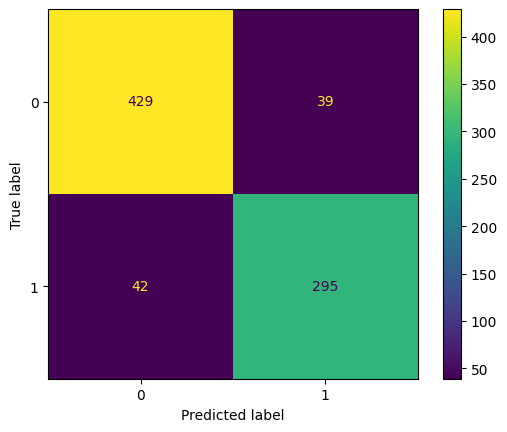

In [ ]:
confusion_matrix = metrics.confusion_matrix(test_y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       468
           1       0.88      0.88      0.88       337

    accuracy                           0.90       805
   macro avg       0.90      0.90      0.90       805
weighted avg       0.90      0.90      0.90       805



Feature Importance:

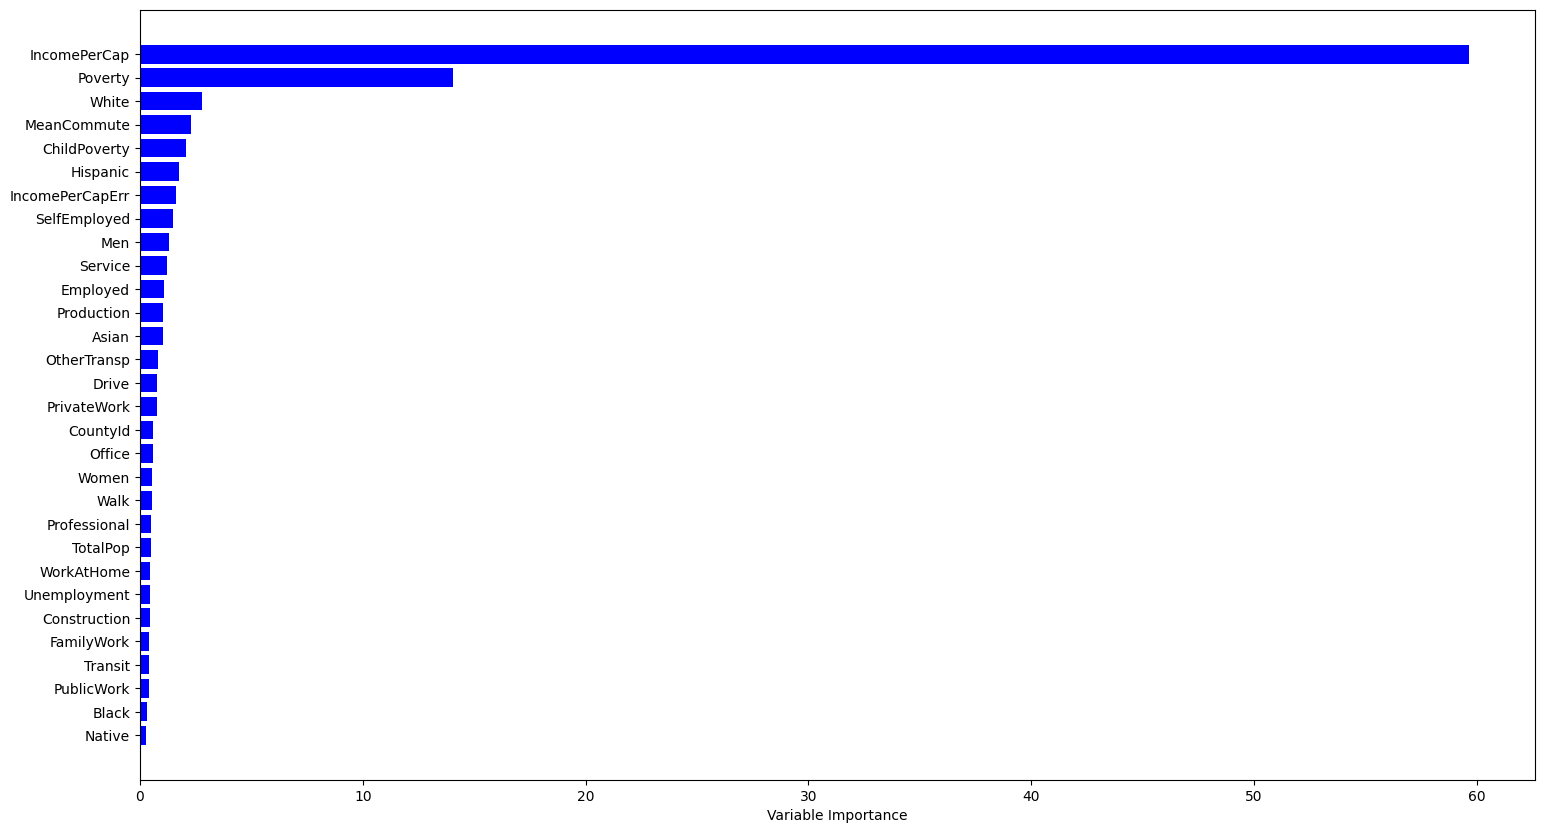

In [ ]:
# Feature Importance:
x = census_X.columns
y = gradientBoost.feature_importances_ * 100

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': x, 'Importance': y})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

fig, ax = plt.subplots(figsize =(18, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel("Variable Importance")
plt.gca().invert_yaxis()
plt.show()